## 2.1 Vorhersage-Feld 

Begründung: Der Preis eines Fahrzeugs ist ideal für Vorhersagen. Viele Faktoren wie Baujahr, Kilometerstand, Hersteller etc. beeinflussen ihn. Doch Unten habe ich schonmal für den Anfang nur 10 Daten anzeigen lassen.



In [75]:

import pandas as pd
import os

file_path = r"C:\Users\AMAR\OneDrive - BBBaden\vehiclesLB259.csv"

vehicles = pd.read_csv(
    file_path,
    sep=';',               # <-- Semikolon als Trennzeichen!
    on_bad_lines='skip',   # Fehlerhafte Zeilen überspringen
    encoding='latin1'      # Windows-kompatibles Encoding
)

vehicles.head(10)

,region,price,year,manufacturer,model,condition,cylinders,fuel,transmission,type,paint_color,state
0,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,other,pickup,white,al
1,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,other,pickup,blue,al
2,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,other,pickup,red,al
3,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,other,pickup,red,al
4,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,automatic,truck,black,al
5,auburn,27990,2012,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,other,pickup,black,al
6,auburn,34590,2016,chevrolet,silverado 1500 double,good,6 cylinders,gas,other,pickup,silver,al
7,auburn,35000,2019,toyota,tacoma,excellent,6 cylinders,gas,automatic,truck,grey,al
8,auburn,29990,2016,chevrolet,colorado extended cab,good,6 cylinders,gas,other,pickup,red,al
9,auburn,38590,2011,chevrolet,corvette grand sport,good,8 cylinders,gas,other,other,red,al


## 2.2 Statistische Analyse für diese Felder

| Feld         | Warum sinnvoll?                                               |
|--------------|---------------------------------------------------------------|
| `price`      | Zielvariable – berechne Mittelwert, Median, Standardabweichung |
| `year`       | Neuere Autos = teurer → Zusammenhang mit `price`              |
| `manufacturer` | Gruppierung für Vergleiche (z. B. VW oder BMW)               |



## Warum?

Ich habe mich auf die numerischen Felder "price", "year" und "cylinders" entschieden. Diese bieten sich besonders für die Berechnung von Mittelwert, Median und Standardabweichung an, da sie mit Zahlen messbar sind. Die übrigen Felder sind größtenteils kategorisch und werden zusätzlich über Häufigkeiten (value_counts) betrachtet.


In [51]:
# Numerische Statistiken
vehicles[['price', 'year']].describe()

# Median und Standardabweichung
print("Median Preis:", vehicles['price'].median())
print("Standardabweichung Preis:", vehicles['price'].std())

# Häufigkeiten für kategorische Felder
vehicles['condition'].value_counts()
vehicles['fuel'].value_counts()


Median Preis: 16990.0
Standardabweichung Preis: 11942241.765916022


fuel
gas         91732
other       17804
diesel       4777
hybrid       2144
electric      912
Name: count, dtype: int64

In [52]:
print("Mittelwert Preis:", vehicles['price'].mean())
print("Minimum Preis:", vehicles['price'].min())
print("Maximum Preis:", vehicles['price'].max())
print("25%-Quantil (unteres Viertel):", vehicles['price'].quantile(0.25))
print("Modus Kraftstoff:", vehicles['fuel'].mode()[0])
print("Anzahl gültiger Preis-Werte:", vehicles['price'].count())


Mittelwert Preis: 71891.03237652191
Minimum Preis: 0
Maximum Preis: 3736928711
25%-Quantil (unteres Viertel): 7499.0
Modus Kraftstoff: gas
Anzahl gültiger Preis-Werte: 117369


## 2.3 Grafik

Hier musste ich nur noch die Preise beliebig begrenzen, da es in meiner Tabelle gewisse Ausreisser gibt, wie z.B. im Milliardenbereich. Das hat mir nicht so gut gefallen und auch die Tabelle war unübersichtlich, also habe ich das dann auf 100'000 geändert. Aber wie schon gesagt, man kann das beliebig ändern.

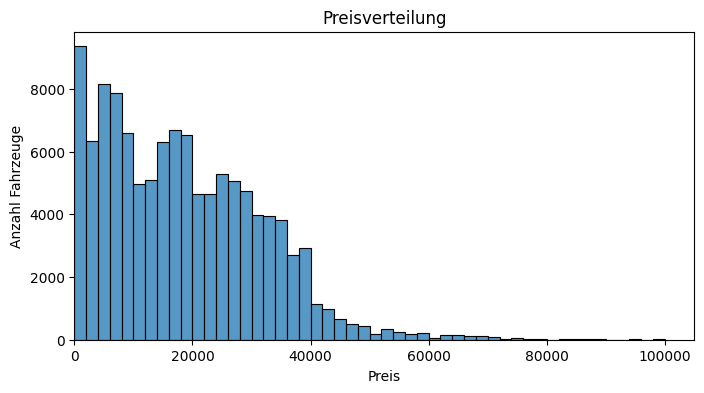

In [83]:
# Preisfilter anwenden (max 100.000)
filtered = vehicles[(vehicles['price'] < 100000) & (vehicles['year'] > 1980)]

# Histogramm – Preisverteilung
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(filtered['price'], bins=50)
plt.title("Preisverteilung")
plt.xlabel("Preis")
plt.ylabel("Anzahl Fahrzeuge")
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()


## 2.4 Ohne Skalierung

Ich habe mich gegen das Skalieren entschieden, weil es für meinen Datensatz keinen echten Nutzen bringt. Ich verwende keine Algorithmen, die Skalierung brauchen (z.B. lineare Regression). Außerdem geht es bei meinen Auswertungen nur um einfache Vergleiche, z. B. Preisverteilung oder Unterschiede zwischen Herstellern. Der Preis soll in echten Zahlen (Dollar) sichtbar bleiben, damit man ihn besser verstehen und vergleichen kann. Auch Felder wie „Baujahr“ oder „Kilometerstand“ sind schon gut lesbar und müssen nicht extra umgerechnet werden.


Die Form der Verteilung bleibt gleich, egal ob der Preis skaliert ist oder nicht. Es ändert sich nur der Wertebereich und nicht die Aussage.
Da ich in meinem Projekt kein Algorithmus verwende, die empfindlich auf Skalen reagieren und weil ich mit echten Preisen arbeite, die gut verständlich sind, bringt Skalieren keinen echten Vorteil.
Daher habe ich mich gegen das Skalieren entschieden. Das einzige was skaliert ist, sind die extremen Werte meiner Preise. Bei mir gibt es einen Ausreisser wie zum Beispiel im Miliardernbereich, was bei meinem Datensatz keinen Sinn ergibt.